In [2]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("ticks")
import random

In [3]:
river='Lynn_R'

location = (42.788413, -80.198752)

In [4]:
WSC_STATIONS = pd.read_pickle('../Loadings Canada 2/data/WSC_STATIONS')
WSC_FLOWS = pd.read_pickle('../Loadings Canada 2/data/WSC_FLOWS')
WSC_STATIONS = WSC_STATIONS[WSC_STATIONS.Flow == True]

PWQMN = pd.read_pickle('../Loadings Canada 2/data/PWQMN')

elem = 'CHLORIDE,         UNFIL.REAC'
PWQMN = PWQMN[(PWQMN["PARM DESCRIPTION"]==elem) & (PWQMN.UNITS!='FORMAZIN TURBIDITY UNIT')]
# PWQMN.loc[PWQMN.UNITS=='MICROGRAM PER LITER', "RESULT"] = PWQMN.RESULT/1000


PWQMN_LOC = pd.read_excel('../../measurements/PWQMN/PWQMN Locations.xlsx')

GLNI = pd.read_excel('../../measurements/GLNI/Canadian_Tributaries_concentrations_Serghei.xlsx', sheet_name='Data_GLNI_Erie tribs')

elem_name='Chloride dissolved'

GLNI = GLNI[GLNI.VariableCommonName==elem_name]

GLNI.SiteName.unique()

delta = 0.5
near_stations = WSC_STATIONS[(WSC_STATIONS.LATITUDE>location[0]-delta) & (WSC_STATIONS.LATITUDE<location[0]+delta) &
                     (WSC_STATIONS.LONGITUDE>location[1]-delta) & (WSC_STATIONS.LONGITUDE<location[1]+delta)]


near_pwqmn_stations = PWQMN_LOC[(PWQMN_LOC.LATITUDE>location[0]-delta) & (PWQMN_LOC.LATITUDE<location[0]+delta) &
                     (PWQMN_LOC.LONGITUDE>location[1]-delta) & (PWQMN_LOC.LONGITUDE<location[1]+delta)]


near_glni_stations = GLNI[(GLNI.Latitude>location[0]-delta) & (GLNI.Latitude<location[0]+delta) &
                     (GLNI.Longitude>location[1]-delta) & (GLNI.Longitude<location[1]+delta)]

near_glni_stations = near_glni_stations[['SiteCode','Latitude','Longitude']]

near_glni_stations = near_glni_stations.rename(index=str, columns={'SiteCode':'STATION', 'Latitude':'Latitude'.upper(), 'Longitude':'Longitude'.upper()})


all_near_stations = pd.DataFrame({'STATION':[], 'LONGITUDE':[], 'LATITUDE':[]})

near_stations = near_stations[['STATION_NUMBER', 'LONGITUDE', 'LATITUDE']]

near_stations = near_stations.rename(index=str, columns={'STATION_NUMBER':'STATION'})


near_pwqmn_stations = near_pwqmn_stations[['STATION', 'LONGITUDE', 'LATITUDE']]

all_near_stations = pd.concat([near_stations, near_pwqmn_stations, near_glni_stations])


/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [5]:
PWQMN_IDS = [[st, False] for st in near_pwqmn_stations.STATION.unique()]
GLNI_IDS = [[st, False] for st in near_glni_stations.STATION.unique()]
Flow_IDS = [[st, False] for st in near_stations.STATION.unique()]
# ECCC_IDS = [[st, False] for st in near_eccc_stations.STATION.unique()]

In [24]:
import folium
# import folium.plugins as plugins
from folium.plugins import MiniMap
from folium.plugins.beautify_icon import BeautifyIcon
from folium.features import DivIcon



# m = folium.Map(width=500,height=300, location=location, zoom_start=11.,tiles="OpenStreetMap", attr='Global Water Futures')
m = folium.Map(width=700,height=500, 
                location=location,
               control_scale = True,
                 zoom_start=12.5,
               zoom_control=False,
                 tiles='https://tile.thunderforest.com/outdoors/{z}/{x}/{y}.png?apikey=34dad269f6ab438c9534def56b86fa5f',
                 API_key='34dad269f6ab438c9534def56b86fa5f',
                attr='Global Water Futures')

# show all Flow
# for index, st_dic in enumerate(Flow_IDS):
#     st = st_dic[0]
# #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
# #     if N>10:
#     st_df = near_stations[near_stations.STATION == st]
#     folium.Marker(location=[st_df.LATITUDE.values[0], 
#                             st_df.LONGITUDE.values[0]], 
#                               popup=folium.Popup(html=st_df.STATION.values[0],
#                             show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')
#                  ).add_to(m)



# # show all
if 0:
    for index, st_dic in enumerate(PWQMN_IDS):
        st = st_dic[0]
    # #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
    # #     if N>10:
        st_df = near_pwqmn_stations[near_pwqmn_stations.STATION == st]
        folium.Marker(location=[st_df.LATITUDE.values[0], 
                                st_df.LONGITUDE.values[0]], 
                                  popup=folium.Popup(html=str(st_df.STATION.values[0]),
                                show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')
                     ).add_to(m)
    for index, st_dic in enumerate(GLNI_IDS):
        st = st_dic[0]
    # #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
    # #     if N>10:
        st_df = near_glni_stations[near_glni_stations.STATION == st]
        folium.Marker(location=[st_df.LATITUDE.values[0], 
                                st_df.LONGITUDE.values[0]], 
                                  popup=folium.Popup(html=str(st_df.STATION.values[0]),
                                show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='green')
                     ).add_to(m)
    for index, st_dic in enumerate(Flow_IDS):
        st = st_dic[0]
    # #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
    # #     if N>10:
        st_df = near_stations[near_stations.STATION == st]
        folium.Marker(location=[st_df.LATITUDE.values[0], 
                                st_df.LONGITUDE.values[0]], 
                                  popup=folium.Popup(html=str(st_df.STATION.values[0]),
                                show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='red')
                     ).add_to(m)
else:
    Show_IDS = [
        [16015900902, True],
        ["ON02GC1100", True],
        [16015900302, True],
        ["02GC008", True],
    ]



    for index, st_dic in enumerate(Show_IDS):
        st = st_dic[0]
        print(st)
        if st_dic[1]:
            clr='#f44242'
        else:
            clr='#0b15c4'
        coef_r = 3
        a,b = random.randrange(-100, 100, 1)*1e-5*coef_r, random.randrange(-100, 100, 1)*1e-5*coef_r
        st_df = all_near_stations[all_near_stations.STATION == st]
        folium.CircleMarker(location=[st_df.LATITUDE.values[0]+a, 
                                st_df.LONGITUDE.values[0]+b], radius=23, 
                            fill=True, fill_color='white',
                                color = clr,fill_opacity=1,
                           weight=5).add_to(m)
        if not index+1 in [2,3]:
            folium.map.Marker(
#         location=[st_df.LATITUDE.values[0]+0.0235+a,st_df.LONGITUDE.values[0]-0.1026+b], # 10 km
#         location=[st_df.LATITUDE.values[0]+0.0135+a,st_df.LONGITUDE.values[0]-0.0526+b], # 5km
#         location=[st_df.LATITUDE.values[0]+0.0065+a,st_df.LONGITUDE.values[0]-0.026+b], # 2km
        location=[st_df.LATITUDE.values[0]+0.0031+a,st_df.LONGITUDE.values[0]-0.013+b], # 1km
            icon=DivIcon(
                icon_size=(150,36),
                icon_anchor=(0,0),
                html='<div style="font-size: 24pt;text-align: center;vertical-align: middle">{}</div>'.format(index+1),
                )
            ).add_to(m)




m


# 16015900102
# 16015900902
# 16015900202
# ON02GC1100
# 16015900302
# 02GC008
# 16015900802


16015900902
ON02GC1100
16015900302
02GC008


In [25]:
selected_stations = [s[0] for s in Show_IDS]

In [26]:
TP_1 = PWQMN[PWQMN.STATION.isin(selected_stations)][['DATE', 'RESULT','STATION']]
TP_1['RESULT'] = pd.to_numeric(TP_1['RESULT'])
# TP_1['RESULT'] = TP_1['RESULT']*(TP_1['RESULT']<20)

TP_2 = GLNI[GLNI.SiteCode.isin(selected_stations)] # [['DATE', 'RESULT','STATION']]
TP_2 = TP_2[['SampleDateTime', 'Value', 'SiteCode']]
TP_2 = TP_2.rename(index=str, columns={'SampleDateTime':'DATE', 'Value':'RESULT', 'SiteCode':'STATION'})

TP = pd.concat([TP_1, TP_2])


TP['RESULT'] = pd.to_numeric(TP['RESULT'])
# TP.STATION = TP.STATION.apply(str)

pt = sns.color_palette("colorblind", len(selected_stations))



In [27]:
TP = TP[TP.RESULT>1]

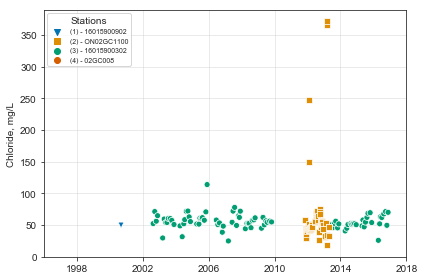

In [28]:
## fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

ax = sns.scatterplot(x='DATE', y='RESULT', data=TP, hue_order=selected_stations, hue='STATION', palette=pt, style='STATION', markers=["o", "v", "s", "p", "*", "o", "v", "s", "p", "*", "o", "v", "s", "p", "*"])
leg = ["({}) - {}".format(i+1,st) for i, st in enumerate(selected_stations)]

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles[1:], leg, title='Stations', fontsize='x-small', loc='best')

# ax.legend(['(1) - HTLP (NCWQR)'], title='Stations', fontsize='x-small', loc=2)

plt.ylim(0,None)
plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Chloride, mg/L")
plt.xlabel("")
plt.tight_layout()
plt.savefig('Rivers/'+river+'/'+river+'_Cl_meas.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/Canada/'+river+'/'+river+'_Cl_meas.pdf')



In [29]:
print(TP.groupby('STATION')["RESULT"].describe().reindex(selected_stations).round(2).to_latex())
      

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &   mean &    std &   min &    25\% &    50\% &    75\% &    max \\
STATION     &        &        &        &       &        &        &        &        \\
\midrule
16015900902 &    2.0 &  50.00 &   0.00 &  50.0 &  50.00 &  50.00 &  50.00 &   50.0 \\
ON02GC1100  &   63.0 &  63.43 &  63.39 &  19.2 &  43.50 &  47.60 &  56.80 &  372.0 \\
16015900302 &   88.0 &  55.82 &  11.75 &  25.0 &  50.77 &  54.35 &  61.58 &  114.0 \\
02GC008     &    NaN &    NaN &    NaN &   NaN &    NaN &    NaN &    NaN &    NaN \\
\bottomrule
\end{tabular}



In [30]:
selected_stations

[16015900902, 'ON02GC1100', 16015900302, '02GC008']

In [31]:
master_stations = [st[0] for st in Show_IDS if st[1]]
# master_stations = selected_stations
master_st_df = TP[TP.STATION.isin(master_stations)]
master_st_df['USGSPCode'] = 0
master_st_df.shape

(153, 4)

In [32]:
master_st_df.DATE = master_st_df[master_st_df.DATE>datetime.datetime(1995,12,31)].DATE.dt.date
# = pd.to_date(master_st_df.DATE, format="%Y-%m-%d")
# master_st_df

In [33]:
master_st_df[[
    'DATE','USGSPCode', 'RESULT']].groupby('DATE').mean().reset_index().sort_values('DATE').to_csv(
    'Rivers/'+river+'/Cl_'+river+'iver_data.csv', index=False)

### Discharge

In [34]:
river

'Lynn_R'

In [35]:
sites = ['02GC008', ]
total_discharge = pd.DataFrame({})
for site in sites:
    discharge = WSC_FLOWS[WSC_FLOWS.index>datetime.datetime(1996,1,1)][site].to_frame()

    discharge = discharge.reset_index()
    discharge = discharge.rename(index=str, columns={site:'Discharge, cms', 'index':'Date'})
    discharge['Source'] = site
#     total_discharge[site] = discharge['Discharge, cms']
    discharge['Flow, CFS'] = discharge['Discharge, cms']/0.028
    total_discharge = pd.concat([total_discharge, discharge])

In [36]:
# discharge = pd.read_excel('../../measurements/ECCC/Discharge_StClair_Detroit_Niagara_Sydenhame_Thames.xlsx')

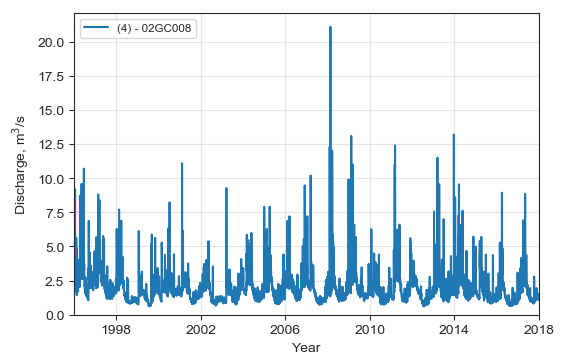

In [37]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
ax=sns.lineplot(x='Date', y='Discharge, cms', data=total_discharge, hue='Source',ax=ax)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

handles, lables = ax.get_legend_handles_labels()
ax.legend(['({}) - {}'.format(selected_stations.index(site)+1, site) for site in lables[1:]], loc=2, fontsize='small')
ax.set_ylim(0,None)
ax.set_xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
ax.grid(alpha=0.5)
ax.set_ylabel("Discharge, m$^3$/s")
ax.set_xlabel("Year")

# axins = zoomed_inset_axes(ax, 8, loc='upper center')
# sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source', ax=axins,zorder=10)
# axins.set_xlim(datetime.datetime(2010,4,1), datetime.datetime(2010,6,1)) # apply the x-limits
# axins.set_ylim(0, 10) # apply the y-limits
# plt.yticks(visible=False)
# plt.xticks(visible=False)
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.savefig('Rivers/'+river+'/'+river+'_Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/Canada/'+river+'/'+river+'_Q.pdf')

In [38]:
total_discharge.groupby(['Source']).describe()

Discharge, cms                                                    \
                 count      mean      std    min   25%   50%   75%   max   
Source                                                                     
02GC008         8035.0  1.867439  1.15977  0.601  1.15  1.58  2.19  21.1   

        Flow, CFS                                                         \
            count       mean        std        min        25%        50%   
Source                                                                     
02GC008    8035.0  66.694262  41.420373  21.464286  41.071428  56.428573   

                                
               75%         max  
Source                          
02GC008  78.214288  753.571443

In [39]:
# discharge = total_discharge[total_discharge.Source=='02GG003']

In [40]:
# discharge['Flow, CFS'] = discharge['Flow, CFS']*1.5

In [41]:
total_discharge[['Date', 'Flow, CFS']].to_csv('Rivers/'+river+'/Flow_'+river+'_CFS.csv', index=False)


### Egret

In [42]:
river

'Lynn_R'

In [43]:

EGRET_Daily = pd.read_csv('Rivers/'+river+'/EGRET Result/Cl/'+river+'iver_Cl_Daily.csv')
EGRET_Sample = pd.read_csv('Rivers/'+river+'/EGRET Result/Cl/'+river+'iver_Cl_Sample.csv')


EGRET_Sample['Fx_Hat'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcHat']/1000/1000
EGRET_Sample['Fx_C'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcAve']/1000/1000


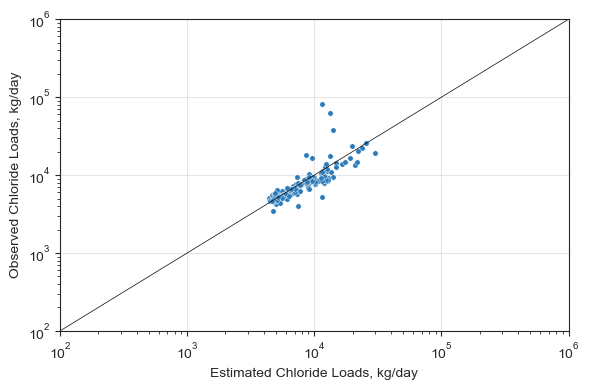

In [44]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
sns.scatterplot(y='Fx_C', 
                x='Fx_Hat',
                data=EGRET_Sample,
                s=15,
                linewidth=0.3, ax=ax,
               color=sns.color_palette("Blues")[4])
# plt.legend("")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot([-100,100000000],[-100,100000000], 'k', lw=0.5)
min_lim, max_lim = 1e2, 1e6
plt.xlim(min_lim,max_lim)
plt.ylim(min_lim,max_lim)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.xlabel("Estimated Chloride Loads, kg/day")
plt.ylabel("Observed Chloride Loads, kg/day")
# plt.xlabel("")
plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/Canada/'+river+'/'+river+'_FvsF.pdf')


In [45]:
EGRET_Daily['FluxYearMTA'] = EGRET_Daily['FluxDay']*365/1000
EGRET_Daily['Fx_SE'] = (np.exp(EGRET_Daily['SE']+EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000-np.exp(EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000)*365
EGRET_Daily_an = EGRET_Daily.groupby('waterYear').mean().reset_index()


EGRET_Daily_an

,waterYear,Unnamed: 0,Q,Julian,Month,Day,DecYear,MonthSeq,i,LogQ,Q7,Q30,yHat,SE,ConcDay,FluxDay,FNConc,FNFlux,FluxYearMTA,Fx_SE
0,1996,137.0,2.884251,53462.0,5.021978,138.000000,1996.376025,1757.021978,137.0,0.940474,2.884263,2.869041,3.759598,0.141035,44.548353,9992.025018,52.661227,8197.895760,3647.089132,554.426683
1,1997,456.0,2.571014,53781.0,6.526027,183.838356,1997.248374,1767.501370,456.0,0.856475,2.591221,2.647273,3.815664,0.150890,46.491084,9756.112011,54.193742,8086.404212,3560.980884,591.193712
2,1998,821.0,1.888554,54146.0,6.526027,183.838356,1998.248288,1779.501370,821.0,0.519084,1.890841,1.907181,3.976185,0.149103,54.512236,8328.246653,54.939285,8201.797066,3039.810028,506.036478
3,1999,1186.0,1.265708,54511.0,6.526027,183.838356,1999.248288,1791.501370,1186.0,0.158522,1.259675,1.248085,4.131975,0.146667,63.516893,6652.098672,55.652667,8312.871783,2428.016015,391.703985
4,2000,1551.5,2.057752,54876.5,6.513661,183.500000,2000.248889,1803.497268,1551.5,0.657731,2.056540,2.035541,3.943456,0.154097,53.223489,8900.867859,56.292961,8420.067999,3248.816768,538.753542
5,2001,1917.0,1.748083,55242.0,6.526027,183.838356,2001.248374,1815.501370,1917.0,0.475005,1.756098,1.787721,4.033529,0.154352,57.694626,8324.045088,56.918747,8513.278322,3038.276457,519.498444
6,2002,2282.0,1.661035,55607.0,6.526027,183.838356,2002.248288,1827.501370,2282.0,0.422640,1.659878,1.663208,4.062332,0.156418,59.416420,8158.133405,57.425957,8596.357369,2977.718693,515.144505
7,2003,2647.0,1.335455,55972.0,6.526027,183.838356,2003.248288,1839.501370,2647.0,0.211714,1.331408,1.320887,4.129491,0.155390,63.610670,6953.126548,57.828877,8664.913565,2537.891190,423.900119
8,2004,3012.5,2.041388,56337.5,6.513661,183.500000,2004.248889,1851.497268,3012.5,0.629030,2.046186,2.050030,3.988851,0.166728,55.404315,9305.056924,58.083041,8718.906123,3396.345777,633.758524
9,2005,3378.0,1.873678,56703.0,6.526027,183.838356,2005.248374,1863.501370,3378.0,0.484293,1.871677,1.873268,4.047026,0.170109,58.914614,8757.133229,58.285492,8754.234248,3196.353629,626.235494


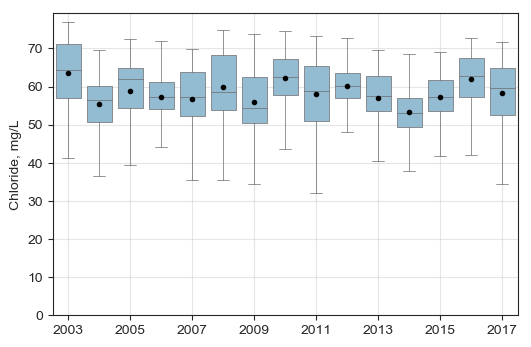

In [46]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

# sns.boxplot(EGRET_Daily['waterYear'], EGRET_Daily['ConcDay'], color=sns.color_palette()[0])

# plt.fill_between(EGRET_Daily_an['waterYear'][5:-1],
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]-EGRET_Daily_an['SE'][5:-1]),
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]+EGRET_Daily_an['SE'][5:-1]), 
#                  color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

meanpointprops = dict(marker='.', markeredgecolor='black', markersize=6,markerfacecolor='black')
ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", 
                 data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2],
                order=range(2003,2018))

# ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
# plt.xlim(2003,2018)
plt.xlim(-0.5, 14.5)
locs, labels = plt.xticks() 
plt.xticks(locs[::2], labels[::2])
plt.ylim(0,None)
# plt.vlines(4.5, 0, 0.6, 'k', '-.', lw=0.7)
# plt.vlines(9.5, 0, 0.6, 'k', '-.', lw=0.7)

# ax.set_xticks([int(x) for x in np.linspace(2003,2017, 8)])

plt.grid(alpha=0.5)
plt.ylabel("Chloride, mg/L")
plt.xlabel("")
# fig.autofmt_xdate()
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/Canada/'+river+'/'+river+'_Cl.pdf')



In [47]:
EGRET_Daily_an['Fx_AE'] = (abs(EGRET_Sample['Fx_Hat'] - EGRET_Sample['Fx_C'])/EGRET_Sample['Fx_C']).mean()*EGRET_Daily_an['FluxYearMTA']




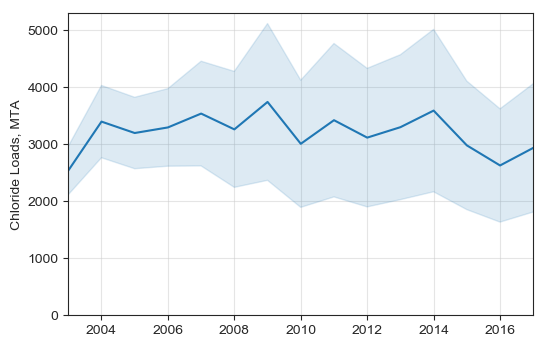

In [48]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

k=None
plt.plot(EGRET_Daily_an['waterYear'][:k], EGRET_Daily_an['FluxYearMTA'][:k], c=sns.color_palette()[0])

# s=12
# plt.plot(EGRET_Daily_an['waterYear'][s:], EGRET_Daily_an['FluxYearMTA'][s:], c=sns.color_palette()[0])

plt.fill_between(EGRET_Daily_an['waterYear'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]-EGRET_Daily_an['Fx_SE'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]+EGRET_Daily_an['Fx_SE'][:k], 
                 color=sns.color_palette()[0], alpha=0.15)

# plt.fill_between(EGRET_Daily_an['waterYear'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]-EGRET_Daily_an['Fx_SE'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]+EGRET_Daily_an['Fx_SE'][s:], 
#                  color=sns.color_palette()[0], alpha=0.15)



# plt.vlines(2007, 0, 200, 'k', '-.', lw=0.7)
# plt.vlines(2013, 0, 200, 'k', '-.', lw=0.7)


# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

# meanpointprops = dict(marker='D', markeredgecolor='black', markersize=1,markerfacecolor=sns.color_palette()[3])
# ax = sns.boxplot(linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="FluxYearMTA", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
plt.ylim(0,None)
plt.xlim(2003,2017)
# plt.xticks([int(x) for x in np.linspace(5,19,8)], [int(x) for x in np.linspace(2003,2017, 8)])
# plt.ylim(0,200)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Chloride Loads, MTA")
plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/Canada/'+river+'/'+river+'_Cl_Flux.pdf')


In [49]:
print(EGRET_Daily_an[(EGRET_Daily_an.waterYear<2018) & (EGRET_Daily_an.waterYear>2002)][['waterYear', 'FluxYearMTA','Fx_SE']].round(1).T.to_latex(index=False))

\begin{tabular}{rrrrrrrrrrrrrrr}
\toprule
     7  &      8  &      9  &      10 &      11 &      12 &      13 &      14 &      15 &      16 &      17 &      18 &      19 &      20 &      21 \\
\midrule
 2003.0 &  2004.0 &  2005.0 &  2006.0 &  2007.0 &  2008.0 &  2009.0 &  2010.0 &  2011.0 &  2012.0 &  2013.0 &  2014.0 &  2015.0 &  2016.0 &  2017.0 \\
 2537.9 &  3396.3 &  3196.4 &  3294.2 &  3537.2 &  3260.1 &  3741.2 &  3007.2 &  3421.1 &  3115.4 &  3298.6 &  3589.6 &  2979.6 &  2627.3 &  2935.7 \\
  423.9 &   633.8 &   626.2 &   679.9 &   918.1 &  1017.0 &  1374.7 &  1115.0 &  1345.2 &  1214.8 &  1270.6 &  1424.1 &  1126.8 &   993.4 &  1124.9 \\
\bottomrule
\end{tabular}



In [50]:
print(TP.groupby('STATION')["RESULT"].describe().reindex(selected_stations).round(2).to_latex())
   

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &   mean &    std &   min &    25\% &    50\% &    75\% &    max \\
STATION     &        &        &        &       &        &        &        &        \\
\midrule
16015900902 &    2.0 &  50.00 &   0.00 &  50.0 &  50.00 &  50.00 &  50.00 &   50.0 \\
ON02GC1100  &   63.0 &  63.43 &  63.39 &  19.2 &  43.50 &  47.60 &  56.80 &  372.0 \\
16015900302 &   88.0 &  55.82 &  11.75 &  25.0 &  50.77 &  54.35 &  61.58 &  114.0 \\
02GC008     &    NaN &    NaN &    NaN &   NaN &    NaN &    NaN &    NaN &    NaN \\
\bottomrule
\end{tabular}

